In [1]:
import sys
sys.path.append("../../")
import warnings
warnings.simplefilter(action="ignore")
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
import plotly.express as px
from functions.eda import *
from functions.cat_eda import *
from functions.basic_cleaning import *
from functions.num_eda import *
from functions.pipeline_helpers import *

In [6]:
data = pl.read_excel('Absenteeism_at_work.xls').sort(by='ID')
data

ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1,22,7,2,1,235,11,14,37,239554,97,0,3,1,0,0,1,88,172,29,8
1,23,8,5,1,235,11,14,37,205917,92,0,3,1,0,0,1,88,172,29,4
1,26,12,4,4,235,11,14,37,261306,97,0,3,1,0,0,1,88,172,29,8
1,7,4,6,3,235,11,14,37,326452,96,0,3,1,0,0,1,88,172,29,3
1,13,6,6,3,235,11,14,37,377550,94,0,3,1,0,0,1,88,172,29,16
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
36,23,5,2,3,118,13,18,50,237656,99,0,1,1,1,0,0,98,178,31,2
36,5,5,3,3,118,13,18,50,237656,99,0,1,1,1,0,0,98,178,31,3
36,0,5,3,3,118,13,18,50,237656,99,1,1,1,1,0,0,98,178,31,0


In [23]:
person1 = data.filter(data["ID"]==1)
person1

ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1,22,7,2,1,235,11,14,37,239554,97,0,3,1,0,0,1,88,172,29,8
1,23,8,5,1,235,11,14,37,205917,92,0,3,1,0,0,1,88,172,29,4
1,26,12,4,4,235,11,14,37,261306,97,0,3,1,0,0,1,88,172,29,8
1,7,4,6,3,235,11,14,37,326452,96,0,3,1,0,0,1,88,172,29,3
1,13,6,6,3,235,11,14,37,377550,94,0,3,1,0,0,1,88,172,29,16
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,13,6,3,1,235,11,14,37,253957,95,0,3,1,0,0,1,88,172,29,8
1,23,8,3,1,235,11,14,37,249797,93,0,3,1,0,0,1,88,172,29,4
1,22,4,6,3,235,11,14,37,246288,91,0,3,1,0,0,1,88,172,29,8


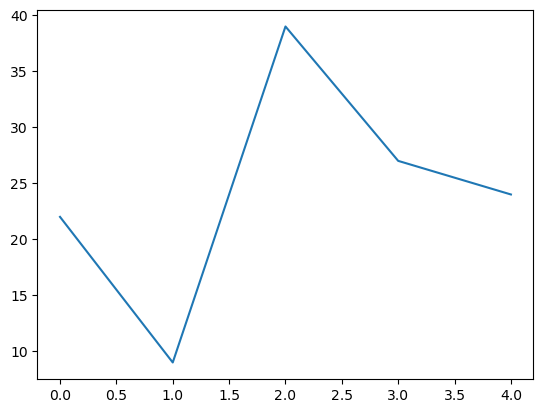

In [25]:
plt.plot(person1.group_by('Day of the week').agg(pl.sum('Absenteeism time in hours'))['Absenteeism time in hours'])

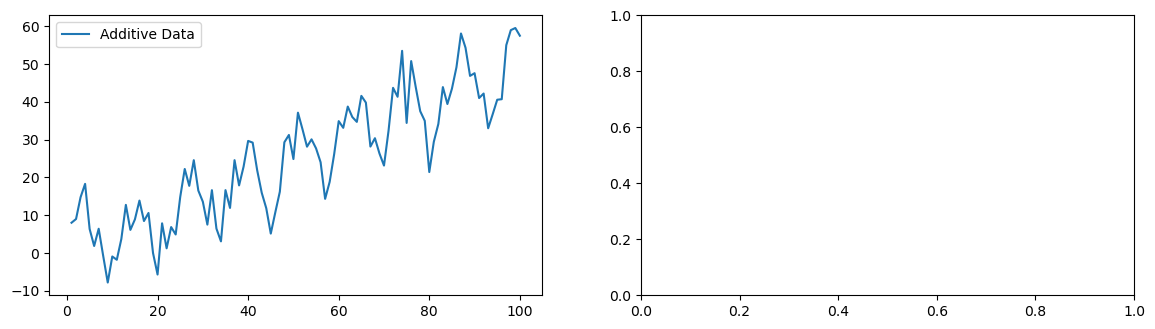

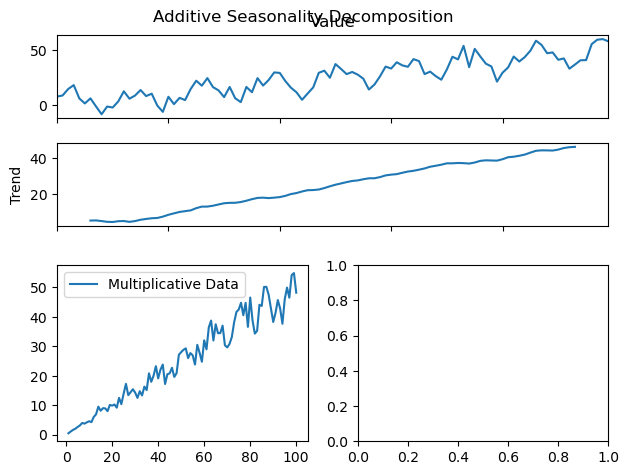

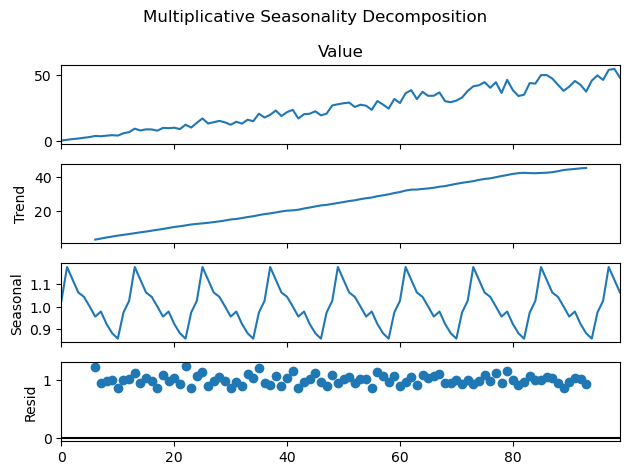

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create synthetic data
np.random.seed(42)
time = np.arange(1, 101)
trend = time * 0.5

# Additive seasonality
seasonal_additive = 10 * np.sin(2 * np.pi * time / 12)
data_additive = trend + seasonal_additive + np.random.normal(scale=5, size  =100)

# Multiplicative seasonality
seasonal_multiplicative = 1 + 0.1 * np.sin(2 * np.pi * time / 12)
data_multiplicative = trend * seasonal_multiplicative * (1 + np.random.normal(scale=0.1, size=100))

# Create DataFrames
df_additive = pd.DataFrame({'Time': time, 'Value': data_additive})
df_multiplicative = pd.DataFrame({'Time': time, 'Value': data_multiplicative})

# Decomposition
decompose_additive = seasonal_decompose(df_additive['Value'], model='additive', period=12)
decompose_multiplicative = seasonal_decompose(df_multiplicative['Value'], model='multiplicative', period=12)

# Plotting
plt.figure(figsize=(14, 8))

# Additive
plt.subplot(2, 2, 1)
plt.plot(df_additive['Time'], df_additive['Value'], label='Additive Data')
plt.legend()

plt.subplot(2, 2, 2)
decompose_additive.plot()
plt.suptitle('Additive Seasonality Decomposition')

# Multiplicative
plt.subplot(2, 2, 3)
plt.plot(df_multiplicative['Time'], df_multiplicative['Value'], label='Multiplicative Data')
plt.legend()

plt.subplot(2, 2, 4)
decompose_multiplicative.plot()
plt.suptitle('Multiplicative Seasonality Decomposition')

plt.tight_layout()
plt.show()
